In [6]:
import pandas as pd
import scanpy as sc
import cudf
import sys
import scanpy as sc
import scFates as scf
sys.path.append("../ConceptFates/")
import gpu_wrappers

In [26]:
palette=["#4E79A7","#A0CBE8","#F28E2B","#59A14F","#8CD17D","#B6992D",
         "#F1CE63","#499894","#86BCB6","#E15759","#FF9D9A","#79706E","#BAB0AC"]

In [62]:
adata=gpu_wrappers.load_mtx("ML8-11/pagoda2/")

In [63]:
adata.obs["leiden"]=pd.read_csv("ML8-11/leiden.tsv",header=None).values.ravel().astype(str)

In [64]:
adata.obsm["X_umap"]=pd.read_csv("ML8-11/UMAP.csv",index_col=0).values
adata.obsm["X_pca"]=pd.read_csv("ML8-11/PCA.csv",index_col=0).values

... storing 'leiden' as categorical


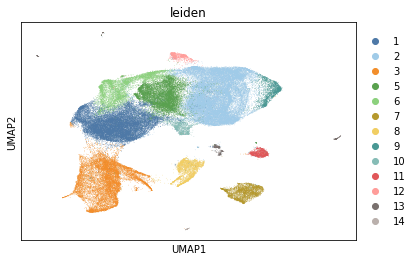

In [65]:
sc.pl.umap(adata,color="leiden",palette=palette)

In [66]:
adata.obs["batch"]=[n.split("_")[0] for n in adata.obs_names]

In [67]:
adata.obs["devtime"]="E11.5"
adata.obs.loc[adata.obs.batch=="ML10","devtime"]="E10.5"
adata.obs.loc[adata.obs.batch=="ML11","devtime"]="E9.5"

In [68]:
adata.write("adata_ML8-11_pagoda2.h5ad")

... storing 'batch' as categorical
... storing 'devtime' as categorical


In [41]:
pal=dict(zip(adata.obs.leiden.cat.categories,palette))

In [55]:
adata=gpu_wrappers.load_mtx("ML6-7/")
adata.obs["leiden"]=pd.read_table("ML6-7/leiden.tsv",header=None)[0].values.astype(str)
adata.obsm["X_pca"]=pd.read_csv("ML6-7/PCA.csv",index_col=0).values
adata.obsm["X_umap"]=pd.read_csv("ML6-7/UMAP.csv",index_col=0).values

In [56]:
adata.obs["batch"]=[n.split("_")[0] for n in adata.obs_names]

In [57]:
[pal[l] for l in adata.obs.leiden.astype("category").cat.categories]

['#4E79A7',
 '#86BCB6',
 '#E15759',
 '#FF9D9A',
 '#79706E',
 '#BAB0AC',
 '#A0CBE8',
 '#F28E2B',
 '#59A14F',
 '#8CD17D',
 '#B6992D',
 '#F1CE63',
 '#499894']

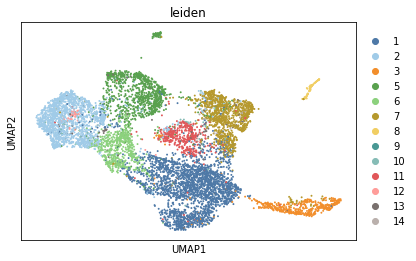

In [59]:
sc.pl.umap(adata,color="leiden",palette=[pal[l] for l in adata.obs.leiden.astype("category").cat.categories])

In [60]:
adata.write("adata_ML6-7_pagoda2.h5ad")

In [61]:
adata

AnnData object with n_obs × n_vars = 7925 × 19481
    obs: 'leiden', 'batch'
    uns: 'leiden_colors'
    obsm: 'X_pca', 'X_umap'

In [69]:
adata=gpu_wrappers.load_mtx("ML8-11/raw//")

In [72]:
import scrublet as scr
scrub = scr.Scrublet(adata.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...


/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 6.8%
Estimated detectable doublet fraction = 55.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 12.2%
Elapsed time: 332.6 seconds
